<tr><td><img src="https://raw.githubusercontent.com/melipass/umayor-ui-proyectos/main/logo-escuela.png" width="400" align="left" style="margin-bottom:20px;margin-right:20px;"></td><td>
    
# <center style="margin-bottom:-50px; margin-top:5px;">Inteligencia Artificial</center>
## <center>Experiencia de Laboratorio 6: Perceptrón simple</center>
    
</td>
</tr>


### Objetivo
Comprobar el funcionamiento de los modelos de redes neuronales correspondientes al perceptrón simple.

### Conceptos
#### Perceptrón
El perceptrón es la red neuronal más básica, de una sola capa y con una función de activación de escalón. El perceptrón se utiliza para la clasificación binaria de datos.

### Desarrollo
#### 1. Implementar el perceptrón

>Implementar un perceptrón simple y genérico en Python con una función de activación. Ajustar los pesos en cada iteración según corresponda, y entregar una salida acorde a la entrada recibida.

In [1]:
# Inicializamos el notebook

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import itertools # para generar las tablas de valor
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

Según lo visto en clases, la función de activación del perceptrón es la de escalón, y será la utilizada en este notebook. Esta está definida de la siguiente manera:

$$ \theta(z)=   \left\{
\begin{array}{ll}
      1 & z \geq 0 \\
      1 & z < 0 \\
\end{array} 
\right.  $$

En donde el valor de $z$ corresponde a el valor ingresado en la función de activación $\theta$, y la salida de la función solo tiene dos valores posibles: $0$ y $1$.

In [2]:
# Función de activación del perceptrón
def theta(z):
    return 1.0 if (z > 0) else 0.0

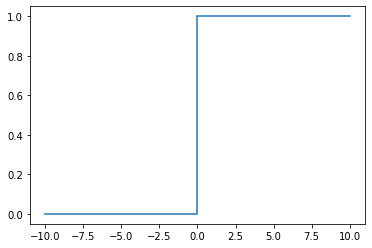

In [3]:
# Gráfico que representa la función de activación anterior
x = [-10,0,1,10] 
y = [0,0,1,1]
plt.step(x, y)
plt.show()

Usando esta función, definimos el perceptrón como:

$$
y(\text{x},\text{w},b) = \theta(\text{w}\cdot\text{x}+b) = \theta(w_1x_1+w_2x_2+\dots+w_nx_n+b)
$$

Donde el vector $\text{x}$ corresponde a las entradas del perceptrón y el vector $\text{w}$ corresponde al peso asignado a cada uno. Esto se suma para después aplicar la función de activación, y queda nuestro perceptrón de la siguiente manera:

In [4]:
def perceptron(x,w,b):
    entrada_theta = np.dot(w,x)+b
    return theta(entrada_theta)

#### 2. Probar el perceptrón en AND, OR y XOR
>Probar el perceptrón implementado para una compuerta lógica $\text{AND}$, $\text{OR}$ y $\text{XOR}$ con una entrada de tamaño 4.

Para implementar perceptrones que simulen las compuertas lógicas $\text{AND}$, $\text{OR}$ y $\text{XOR}$ y que tengan cuatro entradas, debemos tomar el perceptrón y ajustarlo para que quede de la siguiente manera:
$$
y(\text{x})=\theta(w_1x_1+w_2x_2+w_3x_3+w_4x_4+b)
$$

También, sabemos que existe un total de 16 posibles combinaciones de entradas para las compuertras con cuatro entradas, así que las dejaremos codificadas en un arreglo para probar en la parte 4:

In [5]:
l = [0,1]
x = [list(i) for i in itertools.product(l, repeat=4)]
print(x)

[[0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 1], [0, 1, 0, 0], [0, 1, 0, 1], [0, 1, 1, 0], [0, 1, 1, 1], [1, 0, 0, 0], [1, 0, 0, 1], [1, 0, 1, 0], [1, 0, 1, 1], [1, 1, 0, 0], [1, 1, 0, 1], [1, 1, 1, 0], [1, 1, 1, 1]]


##### 2.1. Compuerta AND

La compuerta lógica $\text{AND}$, en nuestro caso, entrega el valor $1$ solo cuando todas sus entradas son $1$. Para que el perceptrón nos entregue el valor $1$ solo cuando todos los valores son $1$, debemos asignar valores a cada peso $w$ y al valor $b$, quedando así:

$$
\text{AND}(\text{x})=\theta(x_1+x_2+x_3+x_4-3.9)
$$

Donde decidimos dejar cada uno de los pesos $w_i = 1$ y el valor $b=-3.9$.

In [6]:
def compuerta_AND(x):
    w = [1,1,1,1]
    b = -3.9
    return perceptron(x,w,b)

##### 2.2. Compuerta OR
La compuerta lógica $\text{OR}$ también obtiene cuatro valores binarios y devuelve $1$ cuando existe al menos una entrada con valor $1$. El perceptrón queda así:

$$
\text{OR}(\text{x})=\theta(x_1+x_2+x_3+x_4-0.9)
$$

Donde decidimos dejar cada uno de los pesos $w_i = 1$ y el valor $b=-0.9$.

In [7]:
def compuerta_OR(x):
    w = [1,1,1,1]
    b = -0.9
    return perceptron(x,w,b)

##### 2.3. Compuerta XOR
En el caso de la compuerta $\text{XOR}$, sabemos que es necesario que nuestra compuerta devuelva el valor $0$ cuando todas las entradas son $0$ o $1$. Para ello, tuvimos que codificar la siguiente situación:

- Encontrar la función que nos de $0$ solo cuando $\text{AND}$ nos devuelve $1$ (en otras palabras, hacer la compuerta $\text{NAND}$).
- Poder combinar el resultado de la compuerta $\text{NAND}$ con el de la compuerta $\text{OR}$, es decir, crear un $\text{AND}$ con dos entradas.

Una vez que identificamos esos dos requisitos creamos una función para cada uno, y así pudimos crear la compuerta $\text{XOR}$ que funciona satisfactoriamente. De esta forma, nos quedó la función $\text{XOR}$ como:

$$
\text{XOR}(\text{x})=\text{AND}(\text{NAND}(\text{x}),\text{OR}(\text{x})) = \text{AND}(\text{NAND}(x_1,x_2,x_3,x_4),\text{OR}(x_1,x_2,x_3,x_4))
$$

In [8]:
def compuerta_AND_2_entradas(x):
    w = [1,1]
    b = -1.9
    return perceptron(x,w,b)

def compuerta_NAND(x):
    w = [-1,-1,-1,-1]
    b = 3.9
    return perceptron(x,w,b)

def compuerta_XOR(x):
    compuerta_1 = compuerta_NAND(x)
    compuerta_2 = compuerta_OR(x)
    return compuerta_AND_2_entradas([compuerta_1,compuerta_2])

#### 3. Probar el perceptrón con un dataset
>Probar el perceptrón implementado para clasificar las entradas del dataset "letters.csv" determinando a qué letra corresponde cada entrada según las características recibidas.

In [9]:
#df = pd.read_csv('letters.csv')

#### 4. Cálculo de error
>Calcular el error obtenido en los pasos 2 y 3 durante el entrenamiento del perceptrón y expresarlo a través de un gráfico Iteración vs. Error.

##### 4.1. Compuertas lógicas
Para poder confirmar visualmente la existencia de un error dentro de nuestros perceptrones que implementan compuertas lógicas, decidimos hacer una función genérica para crear gráficos escalonados. De esta manera, tendremos una guía visual de cuándo un perceptrón devuelve $0$ y cuándo devuelve $1$, y le entregaremos una función que marca el momento en el que se detecta un error para cada uno de los perceptrones.

In [10]:
def graficar_compuerta(x,compuerta,detector_error,titulo):
    h = [0]
    v = [0]
    i = 1
    error_en_titulo = ""
    for posible_valor in x:
        h.append(i)
        i += 1
        v.append(compuerta(posible_valor))
    plt.plot(h, v)
    plt.scatter(h, v, color="orchid", marker="x", s=50)
    plt.xticks(h)
    plt.yticks(v)
    if detector_error(x,compuerta) != 1:
        x_error = int(detector_error(x,compuerta))
        plt.axvline(x = x_error+1, color = 'red')
        error_en_titulo = " (Error)"
    plt.title(titulo+error_en_titulo)
    plt.show()
    df = pd.DataFrame({'Entrada': x, 'Salida': v[1:]})
    print(df)

###### 4.1.1. Prueba AND

Sabiendo que la suma de todos los posibles resultados de la compuerta AND es $1$, sabemos que para un conjunto de entradas $x_n$, donde ninguna combinación de entradas se repite, jamás superaremos el valor 1 al sumar todas las salidas, cualquiera sea su dimensión. Teniendo esto presente, también creamos la siguiente función:

In [11]:
def error_compuerta_AND(x,compuerta):
    i = 0
    for posible_valor in x:
        i += compuerta(posible_valor)
        if i > 1:
            print('Error: Existen entradas incorrectas o la lógica de la compuerta AND no es la correcta.')
            return i
    print("No se detectaron errores.")
    return 1

error_compuerta_AND(x,compuerta_AND)

No se detectaron errores.


1

Tomando los valores que asignamos en la sección 2, obtenemos el siguiente gráfico y la siguiente tabla, donde en el eje x tendremos el índice de la combinación de entradas y en el eje y si esta corresponde a 0 o a 1, lo que nos permitirá confirmar si hay o no hay errores.

No se detectaron errores.


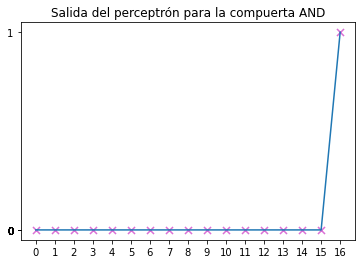

         Entrada  Salida
0   [0, 0, 0, 0]     0.0
1   [0, 0, 0, 1]     0.0
2   [0, 0, 1, 0]     0.0
3   [0, 0, 1, 1]     0.0
4   [0, 1, 0, 0]     0.0
5   [0, 1, 0, 1]     0.0
6   [0, 1, 1, 0]     0.0
7   [0, 1, 1, 1]     0.0
8   [1, 0, 0, 0]     0.0
9   [1, 0, 0, 1]     0.0
10  [1, 0, 1, 0]     0.0
11  [1, 0, 1, 1]     0.0
12  [1, 1, 0, 0]     0.0
13  [1, 1, 0, 1]     0.0
14  [1, 1, 1, 0]     0.0
15  [1, 1, 1, 1]     1.0


In [12]:
graficar_compuerta(x,compuerta_AND,error_compuerta_AND,'Salida del perceptrón para la compuerta AND')

Para poner a prueba nuestro perceptrón que implementa una compuerta, usaremos dos conjuntos: uno con valores que no deberían ser aceptados, y otro con valores repetidos. La línea roja representará la iteración desde la cual comienza a estar erróneo nuestro perceptrón bajo las reglas establecidas de no repetición y admisión exclusiva de entradas $0$ y $1$, teniendo que los valores a la derecha de la línea ya no son correctos pues harán que la suma de todas las salidas sea mayor a $1$.

In [13]:
x_2_3 = [[2,3,3,2],[2,2,2,2],[3,3,3,3]]
x_repetido = [[1,1,1,1],[0,1,1,1],[1,1,1,1],[1,1,0,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]]

In [14]:
error_compuerta_AND(x_2_3,compuerta_AND)

Error: Existen entradas incorrectas o la lógica de la compuerta AND no es la correcta.


2.0

Error: Existen entradas incorrectas o la lógica de la compuerta AND no es la correcta.
Error: Existen entradas incorrectas o la lógica de la compuerta AND no es la correcta.


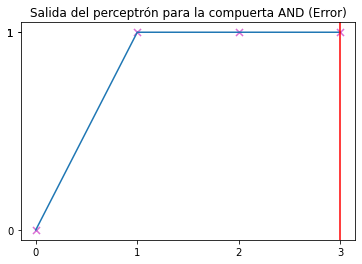

        Entrada  Salida
0  [2, 3, 3, 2]     1.0
1  [2, 2, 2, 2]     1.0
2  [3, 3, 3, 3]     1.0


In [15]:
graficar_compuerta(x_2_3,compuerta_AND,error_compuerta_AND,'Salida del perceptrón para la compuerta AND')

In [16]:
error_compuerta_AND(x_repetido,compuerta_AND)

Error: Existen entradas incorrectas o la lógica de la compuerta AND no es la correcta.


2.0

Error: Existen entradas incorrectas o la lógica de la compuerta AND no es la correcta.
Error: Existen entradas incorrectas o la lógica de la compuerta AND no es la correcta.


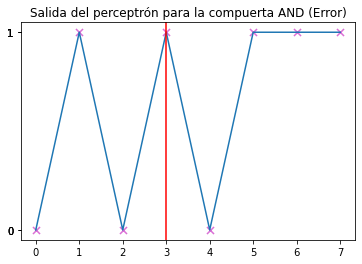

        Entrada  Salida
0  [1, 1, 1, 1]     1.0
1  [0, 1, 1, 1]     0.0
2  [1, 1, 1, 1]     1.0
3  [1, 1, 0, 1]     0.0
4  [1, 1, 1, 1]     1.0
5  [1, 1, 1, 1]     1.0
6  [1, 1, 1, 1]     1.0


In [17]:
graficar_compuerta(x_repetido,compuerta_AND,error_compuerta_AND,'Salida del perceptrón para la compuerta AND')

##### 4.1.2. Prueba OR
Para la prueba en el caso de la compuerta OR, sabemos que si existen $x^2$ posibles combinaciones de entradas (donde $x$ es la cantidad de entradas), siempre existirá una salida que jamás tendrá el valor $1$. Por lo tanto, haremos un chequeo para detectar un error cuando la suma de los resultados de $\text{OR}(x)$ sea igual o mayor que $x^2$, teniendo la misma regla del caso anterior en la que cada combinación solo puede existir una vez en nuestro arreglo.

En el caso específico del perceptrón donde implementamos la compuerta $\text{OR}$, sabemos que hay cuatro entradas, por lo tanto la cantidad de salidas será $4^2=4\times4=16$.

In [18]:
def error_compuerta_OR(x,compuerta):
    i = 0
    for posible_valor in x:
        i += compuerta(posible_valor)
        if i >= (len(x[0])*len(x[0])):
            print('Error: Existen entradas incorrectas o la lógica de la compuerta OR no es la correcta.')
            return i
    print("No se detectaron errores.")
    return 1

No se detectaron errores.


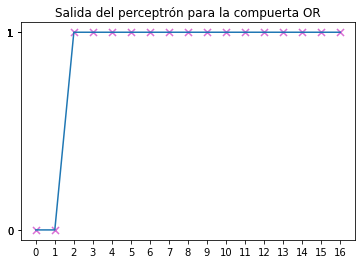

         Entrada  Salida
0   [0, 0, 0, 0]     0.0
1   [0, 0, 0, 1]     1.0
2   [0, 0, 1, 0]     1.0
3   [0, 0, 1, 1]     1.0
4   [0, 1, 0, 0]     1.0
5   [0, 1, 0, 1]     1.0
6   [0, 1, 1, 0]     1.0
7   [0, 1, 1, 1]     1.0
8   [1, 0, 0, 0]     1.0
9   [1, 0, 0, 1]     1.0
10  [1, 0, 1, 0]     1.0
11  [1, 0, 1, 1]     1.0
12  [1, 1, 0, 0]     1.0
13  [1, 1, 0, 1]     1.0
14  [1, 1, 1, 0]     1.0
15  [1, 1, 1, 1]     1.0


In [19]:
graficar_compuerta(x,compuerta_OR,error_compuerta_OR,'Salida del perceptrón para la compuerta OR')

En el ejemplo de arriba, la suma total da 15. Sin embargo, en el ejemplo de abajo, la suma total supera el valor de 15 y nuestro código insertará una línea roja desde el punto en el que el error aparece, considerando incorrecto el gráfico desde esa línea vertical hacia la derecha.

In [26]:
x_error_or = np.copy(x)
x_error_or = x_error_or.tolist()
x_error_or.append([1,2,1,1])
x_error_or.append([1,2,5,1])

Error: Existen entradas incorrectas o la lógica de la compuerta OR no es la correcta.
Error: Existen entradas incorrectas o la lógica de la compuerta OR no es la correcta.


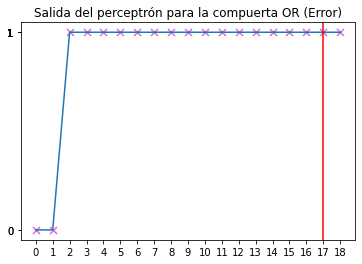

         Entrada  Salida
0   [0, 0, 0, 0]     0.0
1   [0, 0, 0, 1]     1.0
2   [0, 0, 1, 0]     1.0
3   [0, 0, 1, 1]     1.0
4   [0, 1, 0, 0]     1.0
5   [0, 1, 0, 1]     1.0
6   [0, 1, 1, 0]     1.0
7   [0, 1, 1, 1]     1.0
8   [1, 0, 0, 0]     1.0
9   [1, 0, 0, 1]     1.0
10  [1, 0, 1, 0]     1.0
11  [1, 0, 1, 1]     1.0
12  [1, 1, 0, 0]     1.0
13  [1, 1, 0, 1]     1.0
14  [1, 1, 1, 0]     1.0
15  [1, 1, 1, 1]     1.0
16  [1, 2, 1, 1]     1.0
17  [1, 2, 5, 1]     1.0


In [27]:
graficar_compuerta(x_error_or,compuerta_OR,error_compuerta_OR,'Salida del perceptrón para la compuerta OR')

##### 4.1.3. Prueba XOR
Bajo la misma lógica que la prueba anterior, sabemos que la suma de todas las salidas de $\text{XOR}$ siempre será $x^2-2$, donde $x$ corresponde a la cantidad de entradas. Teniendo esto presente, tomaremos el código para validar $\text{OR}$ y lo ajustaremos a $\text{XOR}$, mostrándonos un error cuando la suma de las salidas supera $x^2-2$.

In [22]:
def error_compuerta_XOR(x,compuerta):
    i = 0
    for posible_valor in x:
        i += compuerta(posible_valor)
        if i >= (len(x[0])*len(x[0])-1):
            print('Error: Existen entradas incorrectas o la lógica de la compuerta XOR no es la correcta.')
            return i
    print("No se detectaron errores.")
    return 1

No se detectaron errores.


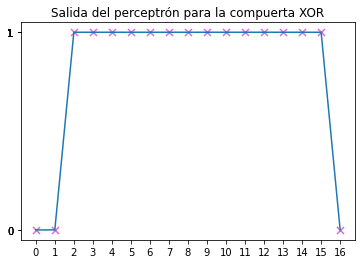

         Entrada  Salida
0   [0, 0, 0, 0]     0.0
1   [0, 0, 0, 1]     1.0
2   [0, 0, 1, 0]     1.0
3   [0, 0, 1, 1]     1.0
4   [0, 1, 0, 0]     1.0
5   [0, 1, 0, 1]     1.0
6   [0, 1, 1, 0]     1.0
7   [0, 1, 1, 1]     1.0
8   [1, 0, 0, 0]     1.0
9   [1, 0, 0, 1]     1.0
10  [1, 0, 1, 0]     1.0
11  [1, 0, 1, 1]     1.0
12  [1, 1, 0, 0]     1.0
13  [1, 1, 0, 1]     1.0
14  [1, 1, 1, 0]     1.0
15  [1, 1, 1, 1]     0.0


In [23]:
graficar_compuerta(x,compuerta_XOR,error_compuerta_XOR,'Salida del perceptrón para la compuerta XOR')

Si repetimos algunas combinaciones, nos encontraremos con que la suma de todas las salidas superará $x^2-2$ y nos dará error:

In [24]:
x_error_xor = np.copy(x)
x_error_xor = x_error_xor.tolist()
x_error_xor.remove([1,1,1,1])
x_error_xor.append([1,0,1,1])
x_error_xor.append([1,0,0,1])
x_error_xor.append([1,0,1,0])
x_error_xor.append([1,1,1,1])

Error: Existen entradas incorrectas o la lógica de la compuerta XOR no es la correcta.
Error: Existen entradas incorrectas o la lógica de la compuerta XOR no es la correcta.


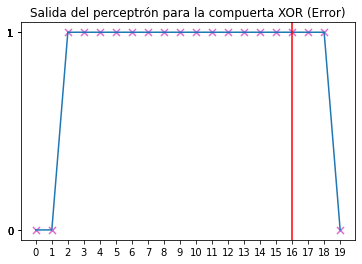

         Entrada  Salida
0   [0, 0, 0, 0]     0.0
1   [0, 0, 0, 1]     1.0
2   [0, 0, 1, 0]     1.0
3   [0, 0, 1, 1]     1.0
4   [0, 1, 0, 0]     1.0
5   [0, 1, 0, 1]     1.0
6   [0, 1, 1, 0]     1.0
7   [0, 1, 1, 1]     1.0
8   [1, 0, 0, 0]     1.0
9   [1, 0, 0, 1]     1.0
10  [1, 0, 1, 0]     1.0
11  [1, 0, 1, 1]     1.0
12  [1, 1, 0, 0]     1.0
13  [1, 1, 0, 1]     1.0
14  [1, 1, 1, 0]     1.0
15  [1, 0, 1, 1]     1.0
16  [1, 0, 0, 1]     1.0
17  [1, 0, 1, 0]     1.0
18  [1, 1, 1, 1]     0.0


In [25]:
graficar_compuerta(x_error_xor,compuerta_XOR,error_compuerta_XOR,'Salida del perceptrón para la compuerta XOR')

#### 5. Análisis
>Analizar y concluír sobre los resultados obtenidos en los pasos 2, 3 y 4.

<!-- Respecto a la compuerta AND y OR, sabemos que el perceptrón devolverá $1$ para cualquier valor entrante mayor o igual que $0$, así que decidimos asignarle el valor $-1.9$ a $b$ para que el resultado de la suma $x_1w_1+x_2w_2+b$ sea $0.1$ solo cuando se cumpla simultáneamente que $x_1=1$ y $x_2=1$. Al analizarlo con el código dentro del $\text{for}$ en la misma celda donde definimos la función, pudimos comprobar que la compuerta funciona correctamente. -->